In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
data = load_wine()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.30, random_state=45)
classifier = tree.DecisionTreeClassifier(min_samples_leaf=3, random_state=1)
classifier = classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

cross_val = cross_val_score(classifier,X_train,y_train, cv=5)
print("Accuracy:" ,  metrics.accuracy_score(y_test, classifier.predict(X_test)))
print("Decison tree scores: ", cross_val, "avg: ", np.mean(cross_val))

Accuracy: 0.9259259259259259
Decison tree scores:  [0.92       0.92       0.92       1.         0.95833333] avg:  0.9436666666666668


In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_leaf=3, random_state=1),  random_state=1, n_estimators=50).fit(X_train, y_train)
print("Accuracy:" ,  metrics.accuracy_score(y_test, clf.predict(X_test)))
cross_val = cross_val_score(clf,X_train,y_train, cv=5)
print("Bagging scores: ", cross_val, "avg: ", np.mean(cross_val))

Accuracy: 0.9629629629629629
Bagging scores:  [0.92       0.92       1.         1.         0.91666667] avg:  0.9513333333333334


In [18]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(min_samples_leaf=3, random_state=1),n_estimators=50, random_state=1, algorithm='SAMME').fit(X_train, y_train)
print("Accuracy:" ,  metrics.accuracy_score(y_test, clf.predict(X_test)))
cross_val = cross_val_score(clf,X_train,y_train, cv=5)
print("AdaBoost scores: ", cross_val, "avg: ", np.mean(cross_val))

Accuracy: 0.9629629629629629
AdaBoost scores:  [0.96       0.92       0.96       1.         0.95833333] avg:  0.9596666666666666


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0, subsample=0.5, min_samples_leaf=3).fit(X_train, y_train)
print("Accuracy:" ,  metrics.accuracy_score(y_test, clf.predict(X_test)))
cross_val = cross_val_score(clf,X_train,y_train, cv=5)
print("AdaBoost scores: ", cross_val, "avg: ", np.mean(cross_val))

Accuracy: 0.9814814814814815
AdaBoost scores:  [0.96       0.92       0.92       1.         0.95833333] avg:  0.9516666666666665


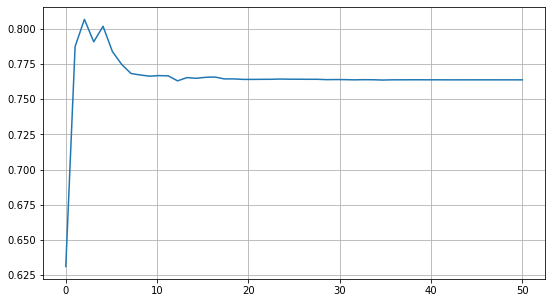

In [20]:
cumsum = np.cumsum(clf.oob_improvement_)
plt.figure(figsize=(9,5))
x_val = np.linspace(0,len(cumsum), 50)
plt.plot(x_val, cumsum)
plt.grid()
plt.show()